# ‰ªï‰∫ã„ÅßÁõÆÊ®ôÁ´ã„Å¶„ÇãÔºü

In [7]:
from bs4 import BeautifulSoup
import requests
import csv
import time

# Ê§úÁ¥¢„Ç≠„Éº„ÉØ„Éº„Éâ
keywords = ['ËÅ∑Â†¥„ÅÆË©ï‰æ°', 'ÁõÆÊ®ôÈÅîÊàê', '„ÇÑ„Çä„Åå„ÅÑ']

# CSV„Éï„Ç°„Ç§„É´„ÅÆÊ∫ñÂÇô
with open('scraped_data.csv', 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Keyword', 'URL', 'Content', 'Age', 'Gender'])  # „Éò„ÉÉ„ÉÄ„Éº

    # ÂêÑ„Ç≠„Éº„ÉØ„Éº„Éâ„Å´ÂØæ„Åó„Å¶Ê§úÁ¥¢„Å®„Çπ„ÇØ„É¨„Ç§„Éî„É≥„Ç∞
    for keyword in keywords:
        # Ameba„Éñ„É≠„Ç∞ÂÜÖÊ§úÁ¥¢URL
        ameba_search_url = f"https://search.ameba.jp/search/entry/{keyword}.html?aid=blogname"

        # Ê§úÁ¥¢ÁµêÊûú„Éö„Éº„Ç∏„ÅÆÂèñÂæó
        response = requests.get(ameba_search_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Ê§úÁ¥¢ÁµêÊûú„ÅÆ„É™„É≥„ÇØ„ÇíÂèñÂæó
        links = soup.find_all('a')  # ÈÅ©Âàá„Å™„Çª„É¨„ÇØ„Çø„Éº„Çí‰ΩøÁî®„Åó„Å¶„É™„É≥„ÇØ„ÇíÂèñÂæó

        # ÂêÑ„É™„É≥„ÇØ„Å´ÂØæ„Åó„Å¶„Çπ„ÇØ„É¨„Ç§„Éî„É≥„Ç∞
        for link in links:
            href = link.get('href')
            if href:  # „É™„É≥„ÇØ„ÅåÂ≠òÂú®„Åô„ÇãÂ†¥Âêà
                try:
                    # „Éö„Éº„Ç∏„ÅÆÂÜÖÂÆπ„ÇíÂèñÂæó
                    page_response = requests.get(href)
                    page_soup = BeautifulSoup(page_response.text, 'html.parser')
                    content = page_soup.text  # Êú¨Êñá„ÅÆÂèñÂæó

                    # Âπ¥ÈΩ¢„ÄÅÊÄßÂà•„ÅÆÂèñÂæóÔºà„Çµ„Ç§„Éà„Å´‰æùÂ≠òÔºâ
                    age = None
                    gender = None

                    # CSV„Å´Êõ∏„ÅçËæº„Åø
                    writer.writerow([keyword, href, content, age, gender])
                    
                    # 10Áßí„ÅÆÈñìÈöî„ÇíË®≠„Åë„Çã
                    time.sleep(10)
                except Exception as e:
                    print(f"An error occurred while processing {href}: {e}")
                    continue  # „Ç®„É©„Éº„ÅåÁô∫Áîü„Åó„ÅüÂ†¥Âêà„ÄÅÊ¨°„ÅÆ„É™„É≥„ÇØ„Å´ÈÄ≤„ÇÄ


An error occurred while processing /: Invalid URL '/': No scheme supplied. Perhaps you meant http:///?
An error occurred while processing /talent/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html: Invalid URL '/talent/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html': No scheme supplied. Perhaps you meant http:///talent/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html?
An error occurred while processing /general/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html: Invalid URL '/general/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html': No scheme supplied. Perhaps you meant http:///general/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html?
An error occurred while processing /news/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html: Invalid URL '/news/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html': No scheme supplied. Perhaps you meant http:///news/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html?
An error occurred while processing /search/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html: Invalid URL '/search/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html': No scheme supplied. Perhaps you meant http:///search/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html?
An error occurred while processing /search/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html: Invalid URL '/search/ËÅ∑Â†¥„ÅÆË©ï‰æ°.html': No scheme supplied. Perhaps you meant http:///search/ËÅ

In [13]:
print(data['Content'].head())

vectorizer = TfidfVectorizer(stop_words=None, min_df=2)
print(data['Content'].head(5))
tfidf_matrix = vectorizer.fit_transform(data['Content'])



Series([], Name: Content, dtype: object)
Series([], Name: Content, dtype: object)


ValueError: empty vocabulary; perhaps the documents only contain stop words

# „Éá„Éº„ÇøÂàÜÊûê

In [15]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# CSV„Éï„Ç°„Ç§„É´„Åã„Çâ„Éá„Éº„Çø„ÇíË™≠„ÅøËæº„ÇÄ
file_path = 'scraped_data.csv' # „Éï„Ç°„Ç§„É´Âêç„ÇíÊ≠£„Åó„ÅÑ„ÇÇ„ÅÆ„Å´Â§âÊõ¥
data = pd.read_csv(file_path)

# ÂøÖË¶Å„Å´Âøú„Åò„Å¶Ê¨†ÊêçÂÄ§„ÇíÂá¶ÁêÜ„Åô„Çã
data = data[data['Content'].notna()]


# ‰∏çË¶Å„Å™ÊñáÂ≠ó„Å™„Å©„ÅÆ„ÇØ„É™„Éº„Éã„É≥„Ç∞
# ‰æãÔºöURL„ÇÑHTML„Çø„Ç∞„ÅÆÂâäÈô§
data['Content'] = data['Content'].str.replace('[^a-zA-Z0-9\s]', '', regex=True)


# TF-IDF„Åß„ÉÜ„Ç≠„Çπ„Éà„Éá„Éº„Çø„ÇíÊï∞ÂÄ§„Å´Â§âÊèõ
vectorizer = TfidfVectorizer(stop_words=None, min_df=2) # ÊúÄ‰Ωé2Âõû‰ª•‰∏äÂá∫Áèæ„Åô„ÇãÂçòË™û„ÅÆ„Åø„ÇíËÄÉÊÖÆ
tfidf_matrix = vectorizer.fit_transform(data['Content'])




# ÂøÖË¶Å„Å´Âøú„Åò„Å¶‰ªñ„ÅÆÂâçÂá¶ÁêÜ„ÇíËøΩÂä†
# ...

# ÂâçÂá¶ÁêÜ„ÅåÂÆå‰∫Ü„Åó„Åü„Éá„Éº„Çø„Çí‰øùÂ≠ò
processed_data = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
processed_data.to_csv('processed_data.csv', index=False)


# „Éí„Çπ„Éà„Ç∞„É©„É†Ë°®Á§∫

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.


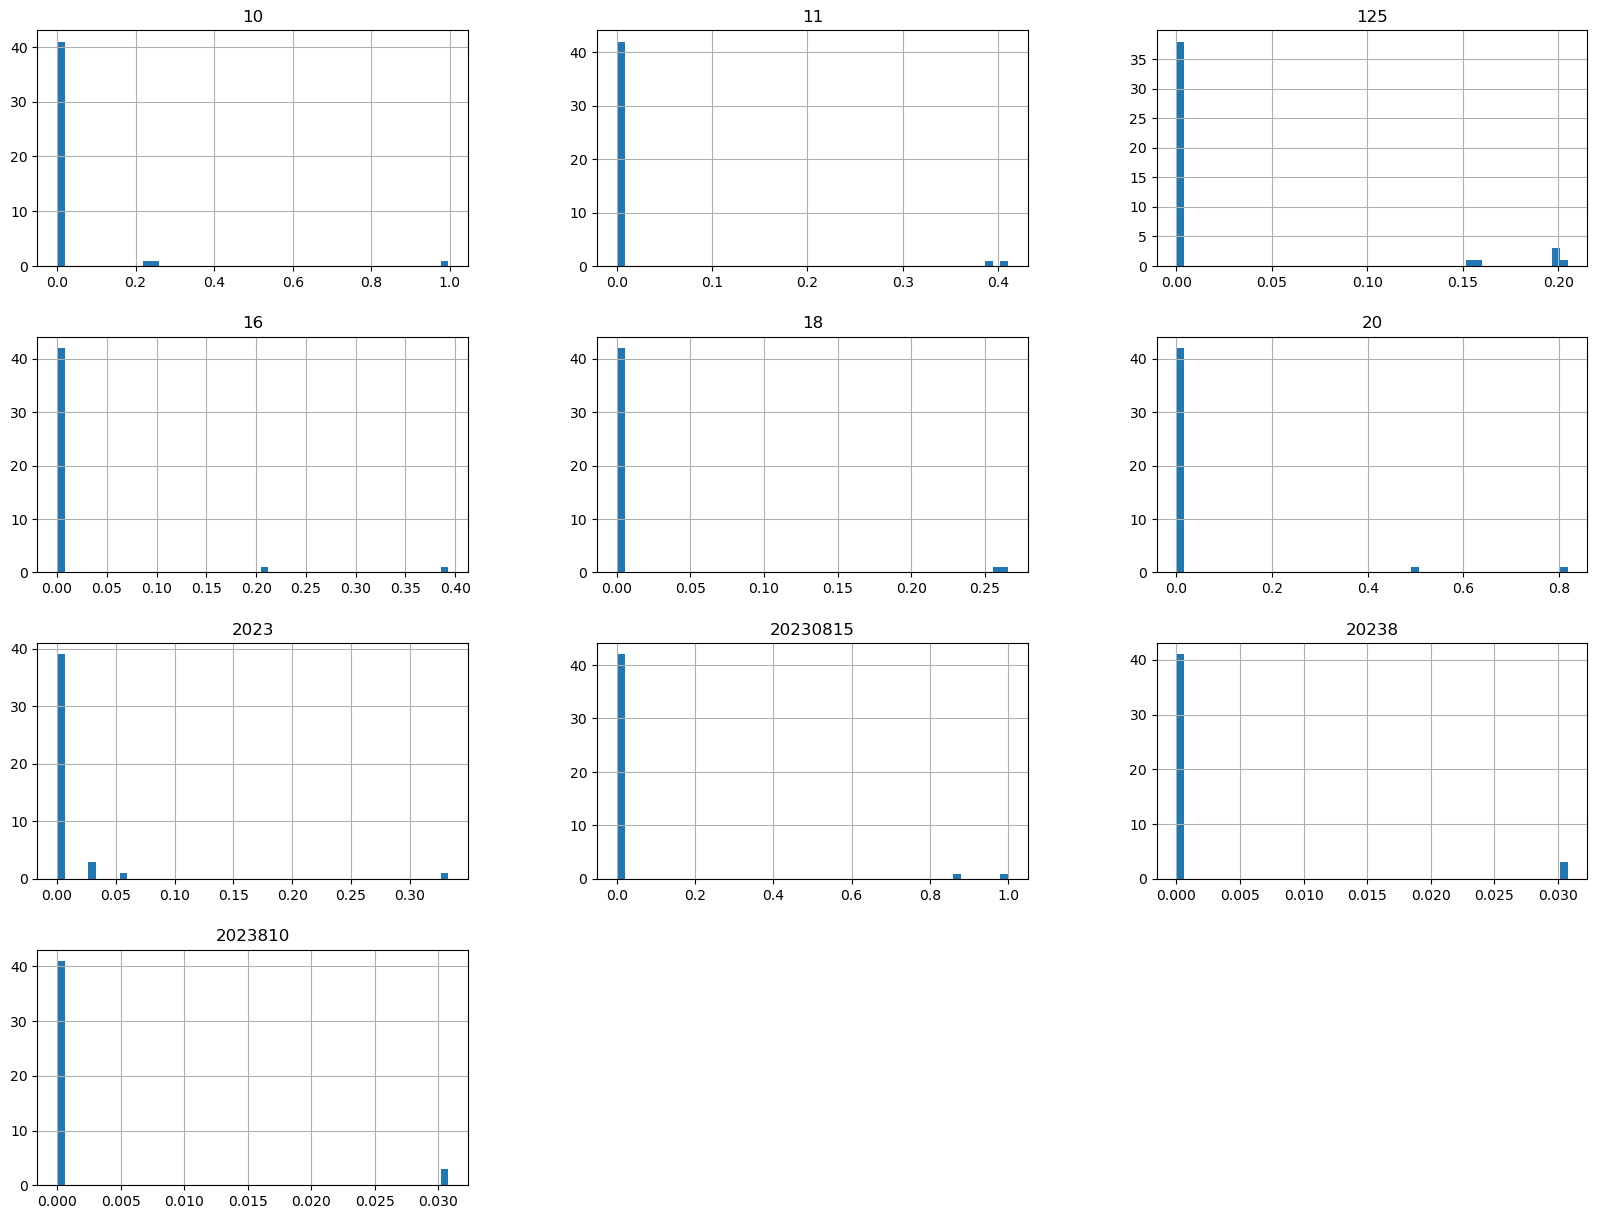

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# ‰æã: ÊúÄÂàù„ÅÆ10ÂÄã„ÅÆÁâπÂæ¥„ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†„Çí„Éó„É≠„ÉÉ„Éà
processed_data.iloc[:, :10].hist(bins=50, figsize=(20,15))
plt.show()


# „Éà„ÉÉ„Éó„ÉØ„Éº„Éâ„Éë„É¨„Éº„ÉàÂõ≥

Total rows in CSV: 44
Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


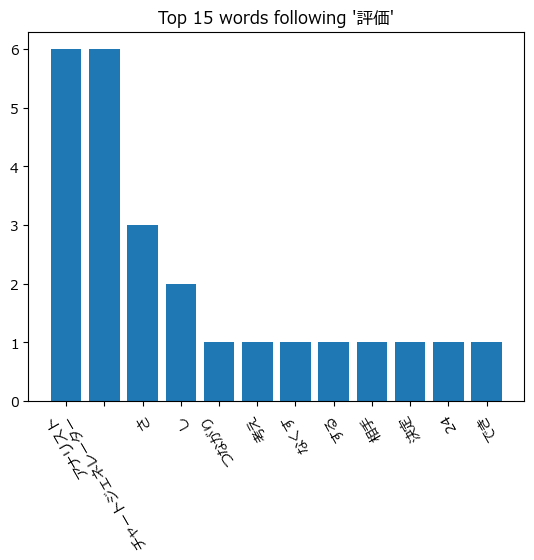

Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


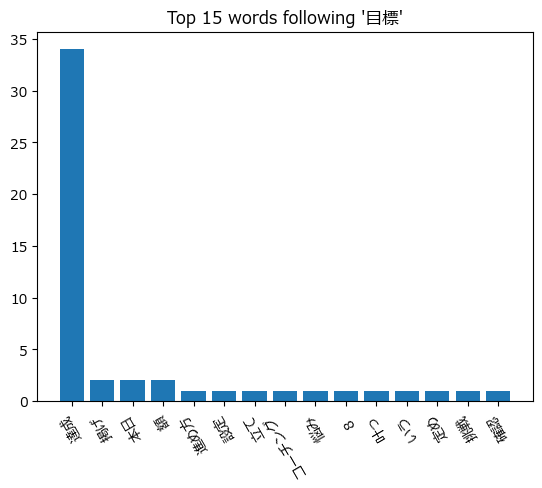

Processing row 0
Processing row 10
Processing row 20
Processing row 30
Processing row 40


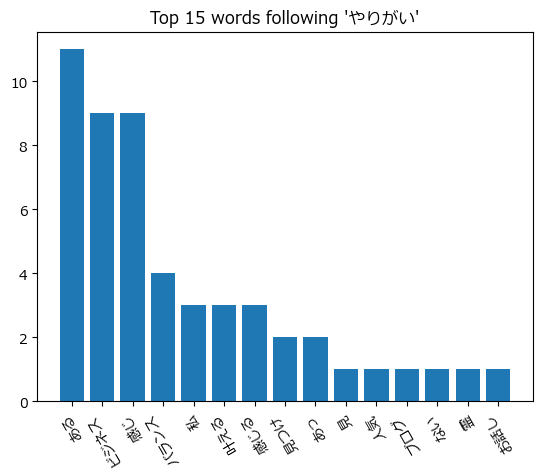

In [12]:
import MeCab
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Meiryo'
# UbuntuÁî®
# mpl.rcParams['font.family'] = 'IPAexGothic'

file_path = 'scraped_data.csv' # „Éï„Ç°„Ç§„É´Âêç„ÇíÊ≠£„Åó„ÅÑ„ÇÇ„ÅÆ„Å´Â§âÊõ¥
data = pd.read_csv(file_path)

# MeCab„ÅÆ„Ç§„É≥„Çπ„Çø„É≥„Çπ„Çí‰ΩúÊàê
keywords = ['Ë©ï‰æ°', 'ÁõÆÊ®ô', '„ÇÑ„Çä„Åå„ÅÑ']

mecab = MeCab.Tagger("-Ochasen")

# CSV„ÅÆË°åÊï∞„ÇíË°®Á§∫
print(f"Total rows in CSV: {len(data)}")

# ÂêÑ„Ç≠„Éº„ÉØ„Éº„Éâ„ÅÆÂæå„Å´Á∂ö„Åè„ÉØ„Éº„Éâ„Çí„Ç´„Ç¶„É≥„Éà
for keyword in keywords:
    following_words = []

    for index, content in enumerate(data['Content']):
        node = mecab.parseToNode(content)
        words = []
        while node:
            features = node.feature.split(',')
            # ÂêçË©û„ÄÅÂãïË©û„ÄÅÂΩ¢ÂÆπË©û„ÅÆ„Åø„ÇíÂØæË±°„Å®„Åô„ÇãÔºàÂä©Ë©û„ÇÑÊé•Á∂öË©û„Å™„Å©„ÇíÈô§Â§ñÔºâ
            if features[0] in ['ÂêçË©û', 'ÂãïË©û', 'ÂΩ¢ÂÆπË©û']:
                words.append(node.surface)
            node = node.next

        for i, word in enumerate(words):
            if word == keyword and i < len(words) - 1:
                next_word = words[i + 1]
                next_node = mecab.parseToNode(next_word)
                next_features = next_node.feature.split(',')
                if next_features[0] not in ['Âä©Ë©û', 'Âä©ÂãïË©û', 'Ë®òÂè∑']:
                    following_words.append(next_word)

        # ÈÄî‰∏≠ÁµåÈÅé„ÇíË°®Á§∫Ôºà‰æãÔºö10Ë°å„Åî„Å®Ôºâ
        if index % 10 == 0:
            print(f"Processing row {index}")

    word_counts = Counter(following_words)


    # „Éà„ÉÉ„Éó15„ÉØ„Éº„Éâ„ÇíÊäΩÂá∫
    top_15_words = word_counts.most_common(15)

    # ÁµêÊûú„ÅåÂ≠òÂú®„Åô„ÇãÂ†¥Âêà„ÅÆ„Åø„Éó„É≠„ÉÉ„Éà
    if top_15_words:
        words, counts = zip(*top_15_words)
        plt.bar(words, counts)
        plt.title(f"Top 15 words following '{keyword}'")
        plt.xticks(rotation=3000)
        plt.show()
    else:
        print(f"No words found following '{keyword}'")


# ÊñáËÑà„ÇíË¶ã„Çã

In [13]:
for keyword in keywords:
    sentences_with_keyword = []

    for content in data['Content']:
        node = mecab.parseToNode(content)
        words = []
        while node:
            words.append(node.surface)
            node = node.next

        sentence = " ".join(words)
        if keyword in sentence:
            sentences_with_keyword.append(sentence)

    # „Ç≠„Éº„ÉØ„Éº„Éâ„ÇíÂê´„ÇÄ„Çª„É≥„ÉÜ„É≥„Çπ„ÅÆ‰∏ÄÈÉ®„ÇíË°®Á§∫
    print(f"Sentences with keyword '{keyword}':")
    for sentence in sentences_with_keyword[:5]:
        print(sentence)


Sentences with keyword 'Ë©ï‰æ°':
 „Çµ„Ç§„Éê„Éº„Ç®„Éº„Ç∏„Çß„É≥„Éà „Åå LLM ÈñãÁô∫ „Å´ Ë∏è„ÅøËæº„ÇÄ ÁêÜÁî± CyberAgent Way ¬† 1 ¬† 2 ¬† 3 ¬† 4 ¬† 5 ¬† ¬† ¬† ¬† ¬† Scroll ¬† Topics „Éà„Éî„ÉÉ„ÇØ„Çπ „Éó„É¨„Çπ „É™„É™„Éº„Çπ 2023 Âπ¥ 8 Êúà 18 Êó• AI Lab „ÄÅ Êé®Ëñ¶ „Ç∑„Çπ„ÉÜ„É† ÂàÜÈáé „ÅÆ „Éà„ÉÉ„Éó „Ç´„É≥„Éï„Ç°„É¨„É≥„Çπ „Äå RecSys 2023 „Äç „Å´„Å¶ ‰∏ªËëó Ë´ñÊñá Êé°Êäû „Éó„É¨„Çπ „É™„É™„Éº„Çπ 2023 Âπ¥ 8 Êúà 10 Êó• ÊÇ£ËÄÖ „Å® „ÇØ„É™„Éã„ÉÉ„ÇØ „Çí „Å§„Å™„Åê „ÄÅ „Éë„Éº„ÇΩ„Éä„É´ ÁæéËÇå Ê≤ªÁôÇ „ÅÆ „Ç™„É≥„É©„Ç§„É≥ Ë®∫ÁôÇ „Éó„É©„ÉÉ„Éà„Éï„Ç©„Éº„É† „Äå TOIRO ÁæéËÇå Èô¢ „Äç „Çí ÈñãÂßã CyberAgent Way 2023 Âπ¥ 8 Êúà 9 Êó• Êó•Êú¨ „ÅÆ ÁîüÊàê AI „ÅÆ Áô∫Â±ï „Åæ„Åß ÁõÆÊåá„Åô „Çµ„Ç§„Éê„Éº„Ç®„Éº„Ç∏„Çß„É≥„Éà „Åå LLM ÈñãÁô∫ „Å´ Ë∏è„ÅøËæº„ÇÄ ÁêÜÁî± „Éã„É•„Éº„Çπ ‰∏ÄË¶ß ¬† ÁâπÈõÜ Ë®ò‰∫ã ‰∏ÄË¶ß ¬† ¬† ¬† ¬† Corporate ‰ºÅÊ•≠ ¬† ¬† ¬† News „Éã„É•„Éº„Çπ ¬† ¬† ¬† Services „Çµ„Éº„Éì„Çπ ¬† ¬† ¬† Tech / Design ÊäÄË°ì „Éª „Éá„Ç∂„Ç§„É≥ ¬† ¬† ¬† Careers Êé°Áî® ¬† ¬† ¬† IR ÊäïË≥á ÂÆ∂ ÊÉÖÂ†± ¬† ¬† ¬† Sustainability „Çµ„Çπ„ÉÜ„Éä„Éì„É™„ÉÜ„

# ‰πÖ„Åó„Å∂„Çä„ÅÆÂÖ±Ëµ∑„Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ

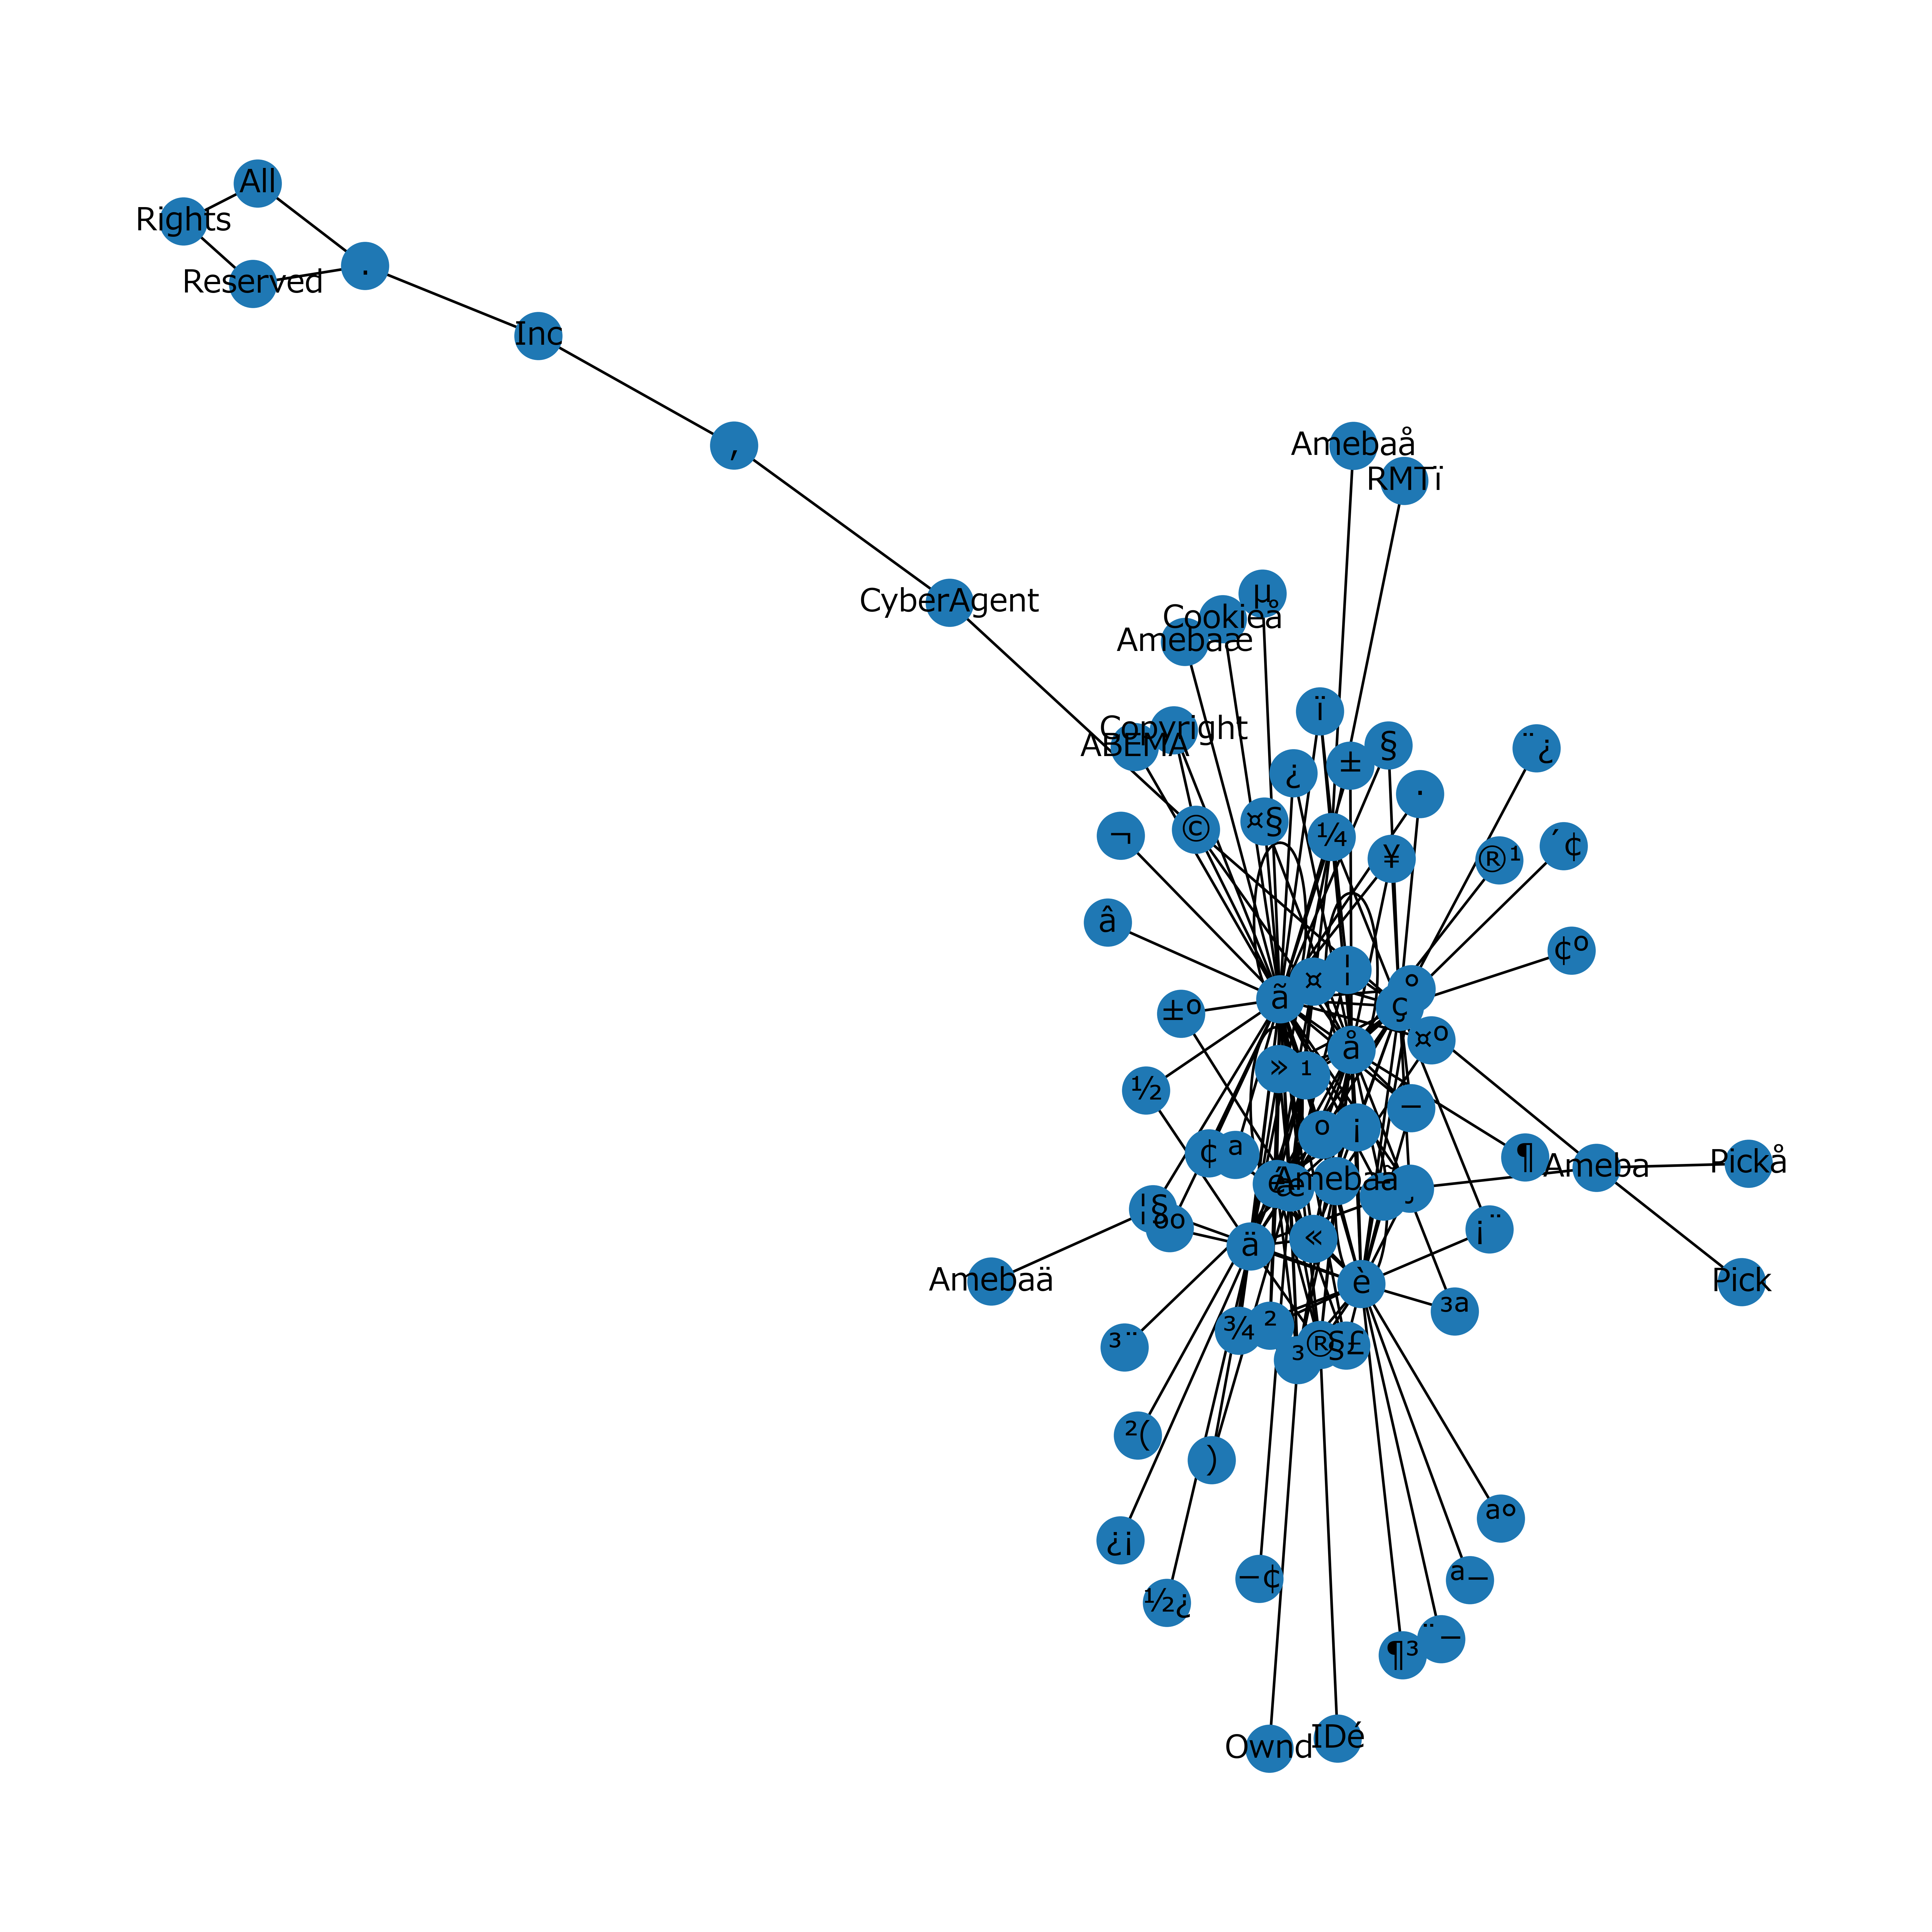

In [24]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import Counter

plt.rcParams['font.family'] = 'Meiryo'



# ÂçòË™û„ÅÆÂá∫ÁèæÂõûÊï∞„Çí„Ç´„Ç¶„É≥„Éà
words_count = Counter()
for content in data['Content']:
    node = mecab.parseToNode(content)
    while node:
        features = node.feature.split(',')
        if features[0] in ['ÂêçË©û', 'ÂãïË©û', 'ÂΩ¢ÂÆπË©û']:
            words_count[node.surface] += 1
        node = node.next

G = nx.Graph()

for content in data['Content']:
    node = mecab.parseToNode(content)
    words = []
    while node:
        features = node.feature.split(',')
        if features[0] in ['ÂêçË©û', 'ÂãïË©û', 'ÂΩ¢ÂÆπË©û']:
            words.append(node.surface)
        node = node.next

# Âá∫ÁèæÂõûÊï∞„Åå10Âõû‰ª•‰∏ä„ÅÆ„ÉØ„Éº„Éâ„Å†„Åë„ÇíË°®Á§∫
for i in range(len(words) - 1):
    if words_count[words[i]] >= 10 and words_count[words[i + 1]] >= 1:
        G.add_edge(words[i], words[i + 1])

# „Éç„ÉÉ„Éà„ÉØ„Éº„ÇØ„ÅÆÊèèÁîª
plt.figure(figsize=(10, 10), dpi=600)
nx.draw(G, with_labels=True, font_family='Meiryo')
plt.show()



# ÊÑüÊÉÖ„Éó„É≠„ÉÉ„Éà

In [26]:
!pip install textblob„ÄÄ

     -------------------------------------- 636.8/636.8 kB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 19.2 MB/s eta 0:00:00


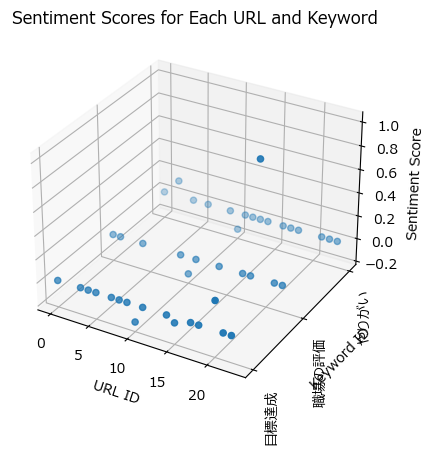

In [36]:
# URL„Å®Keyword„Çí‰∏ÄÊÑè„ÅÆID„Å´Â§âÊèõ
url_ids = {url: idx for idx, url in enumerate(set(data['URL']))}
keyword_ids = {keyword: idx for idx, keyword in enumerate(set(data['Keyword']))}

# URL, Keyword, ÊÑüÊÉÖ„Çπ„Ç≥„Ç¢„ÅÆ„É™„Çπ„Éà„Çí‰ΩúÊàê
url_indices = []
keyword_indices = []
sentiment_scores = []
for url, keyword, content in zip(data['URL'], data['Keyword'], data['Content']):
    sentiment_score = TextBlob(content).sentiment.polarity
    url_indices.append(url_ids[url])
    keyword_indices.append(keyword_ids[keyword])
    sentiment_scores.append(sentiment_score)

# 3D„Éó„É≠„ÉÉ„Éà„ÅÆ‰ΩúÊàê
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(url_indices, keyword_indices, sentiment_scores)
plt.title('Sentiment Scores for Each URL and Keyword')
ax.set_xlabel('URL ID')
ax.set_ylabel('Keyword ID')
ax.set_zlabel('Sentiment Score')

# „Ç≠„Éº„ÉØ„Éº„ÉâID„ÇíÊó•Êú¨Ë™û„ÅÆ„Ç≠„Éº„ÉØ„Éº„Éâ„Å´Â§âÊèõ„Åó„Å¶„É©„Éô„É´„ÇíË®≠ÂÆö
plt.yticks(list(keyword_ids.values()), list(keyword_ids.keys()), rotation=90)

plt.show()


# „Åï„Çâ„Å´„Ç∞„É©„Éï

In [40]:
import MeCab
from collections import defaultdict
import pandas as pd

# Read the CSV file
file_path = "scraped_data.csv"
data = pd.read_csv(file_path)

# Initialize MeCab
mecab = MeCab.Tagger("-Ochasen")

# Define the keywords
keywords = ["ÁõÆÊ®ô", "ÈÅîÊàê"]

# Function to extract nouns and verbs from a sentence
def extract_nouns_verbs(sentence):
    nouns = []
    verbs = []
    parsed_text = mecab.parse(sentence)
    for line in parsed_text.split('\n'):
        elements = line.split('\t')
        if len(elements) >= 4:
            word_type = elements[3].split('-')[0]
            if word_type == "ÂêçË©û":
                nouns.append(elements[0])
            elif word_type == "ÂãïË©û":
                verbs.append(elements[0])
    return nouns, verbs

# Extract sentences containing the keywords
sentences_with_keywords = defaultdict(list)
for content in data['Content']:
    for sentence in str(content).split('.'):
        for keyword in keywords:
            if keyword in sentence:
                sentences_with_keywords[keyword].append(sentence.strip())

# Extract nouns and verbs for each keyword
nouns_verbs_by_keyword = defaultdict(lambda: {'nouns': [], 'verbs': []})
for keyword, sentences in sentences_with_keywords.items():
    for sentence in sentences:
        nouns, verbs = extract_nouns_verbs(sentence)
        nouns_verbs_by_keyword[keyword]['nouns'].extend(nouns)
        nouns_verbs_by_keyword[keyword]['verbs'].extend(verbs)

# Print the results
for key, value in nouns_verbs_by_keyword.items():
    print(f"For keyword '{key}':")
    print("Nouns:", value['nouns'])
    print("Verbs:", value['verbs'])
    print()


For keyword 'ÁõÆÊ®ô':
Nouns: ['ÂÆÆÂ≤°', 'ÁúüÁî±Áæé', 'ÂøÉÁêÜ', '„Ç´„Ç¶„É≥„Çª„É©„Éº', 'Êù±‰∫¨', '„Ç™„É≥„É©„Ç§„É≥', 'Â§¢', 'ÂÆüÁèæ', 'ÁõÆÊ®ô', 'ÈÅîÊàê', 'Ëá™‰ø°', '„Éª', '‰∫∫', 'Ëã¶Êâã', 'ÊÑõÁùÄ', 'ÈöúÂÆ≥', '„Åï', 'ÂçíÊ•≠', 'ÂÆÆÂ≤°', 'ÁúüÁî±Áæé', 'ÂøÉÁêÜ', '„Ç´„Ç¶„É≥„Çª„É©„Éº', 'Êù±‰∫¨', '„Ç™„É≥„É©„Ç§„É≥', 'Â§¢', 'ÂÆüÁèæ', 'ÁõÆÊ®ô', 'ÈÅîÊàê', 'Ëá™‰ø°', '„Éª', '‰∫∫', 'Ëã¶Êâã', 'ÊÑõÁùÄ', 'ÈöúÂÆ≥', '„Åï', 'ÂçíÊ•≠', '„Éõ„Éº„É†„Éî„Ç∞„Ç¢„É°„Éñ„É≠', 'Ëä∏ËÉΩ‰∫∫', '„Éñ„É≠„Ç∞', '‰∫∫Ê∞ó', '„Éñ„É≠„Ç∞', 'Êñ∞Ë¶è', 'ÁôªÈå≤', '„É≠„Ç∞„Ç§„É≥', 'ÂÆÆÂ≤°', 'ÁúüÁî±Áæé', 'ÂøÉÁêÜ', '„Ç´„Ç¶„É≥„Çª„É©„Éº', 'Êù±‰∫¨', '„Ç™„É≥„É©„Ç§„É≥', 'Â§¢', 'ÂÆüÁèæ', 'ÁõÆÊ®ô', 'ÈÅîÊàê', 'Ëá™‰ø°', '„Éª', '‰∫∫', 'Ëã¶Êâã', 'ÊÑõÁùÄ', 'ÈöúÂÆ≥', '„Åï', 'ÂçíÊ•≠', 'Èï∑Â•≥', 'Ê∞óË≥™', 'ÊÇ©„Åø', 'Ê†πÊú¨', 'Ëß£Ê±∫', 'ÈÄü', 'Â§¢', 'ÁßÅ', 'Â≠¶Ê†°', '„Éó„É¨„Ç∑„É£„Çπ„É©„Ç§„Éï„Ç¢„Ç´„Éá„Éü„Éº', 'Ëá™‰ø°', 'Ëá™ÂàÜ', '„Åì„Å®', '‰∫∫', 'Ëã¶Êâã', 'ÈõÜÂõ£', 'Ëã¶Êâã', '„Éì„É™„Éº„Éï„ÉÅ„Çß„É≥„Ç∏', '„Ç¢„ÉÄ„É´„Éà', '„ÉÅ„É´„Éâ„É¨„É≥', '‰∏çÂÆâ', '„ÅÜ„Å§', 'Êîπ

# „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞ÂàÜÊûê

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# List of nouns for the keyword 'ÁõÆÊ®ô'
nouns_target = ['„Éè„ÉÉ„Éî„Éº', 'ÊàêÈï∑', 'ÂøÉÁêÜ', '„ÇÑ„Çä„Åå„ÅÑ', 'Ëá™ÂàÜ', 'ÊàêÂäü', 'Â§¢', 'ÂÆüÁèæ', 'ÁõÆÊ®ô', 'ÈÅîÊàê', 'Ëá™‰ø°', 'Êé¢„Åô', '‰∫∫', 'Ëã¶Êâã', 'ÊÑõÁùÄ', 'ÈöúÂÆ≥', '„Åï', 'ÂçíÊ•≠'] # Add all the nouns here

# Apply TF-IDF
vectorizer = TfidfVectorizer(analyzer=lambda x: x)
X = vectorizer.fit_transform([[noun] for noun in nouns_target])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5) # You can change the number of clusters
kmeans.fit(X)

# Get the cluster centers
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

# Print the top terms per cluster
for i in range(5): # Number of clusters
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]: # Top 10 terms in each cluster
        print(f" {terms[ind]}")
    print()



Cluster 0:
 ÈöúÂÆ≥
 ÈÅîÊàê
 „ÇÑ„Çä„Åå„ÅÑ
 ‰∫∫
 ÂçíÊ•≠
 Â§¢
 ÂÆüÁèæ
 ÂøÉÁêÜ
 „Åï
 ÊàêÂäü

Cluster 1:
 „Éè„ÉÉ„Éî„Éº
 ÈöúÂÆ≥
 ÈÅîÊàê
 „ÇÑ„Çä„Åå„ÅÑ
 ‰∫∫
 ÂçíÊ•≠
 Â§¢
 ÂÆüÁèæ
 ÂøÉÁêÜ
 ÊÑõÁùÄ

Cluster 2:
 ÊàêÈï∑
 ÈöúÂÆ≥
 ÂøÉÁêÜ
 „ÇÑ„Çä„Åå„ÅÑ
 „Éè„ÉÉ„Éî„Éº
 ‰∫∫
 ÂçíÊ•≠
 Â§¢
 ÂÆüÁèæ
 ÊÑõÁùÄ

Cluster 3:
 ÁõÆÊ®ô
 ÈöúÂÆ≥
 ÂøÉÁêÜ
 „ÇÑ„Çä„Åå„ÅÑ
 „Éè„ÉÉ„Éî„Éº
 ‰∫∫
 ÂçíÊ•≠
 Â§¢
 ÂÆüÁèæ
 ÊÑõÁùÄ

Cluster 4:
 ÊÑõÁùÄ
 ÈÅîÊàê
 „ÇÑ„Çä„Åå„ÅÑ
 „Éè„ÉÉ„Éî„Éº
 ‰∫∫
 ÂçíÊ•≠
 Â§¢
 ÂÆüÁèæ
 ÂøÉÁêÜ
 ÈöúÂÆ≥



# 2Ê¨°ÂÖÉ„Éó„É≠„ÉÉ„Éà „ÇØ„É©„Çπ„Çø„É™„É≥„Ç∞

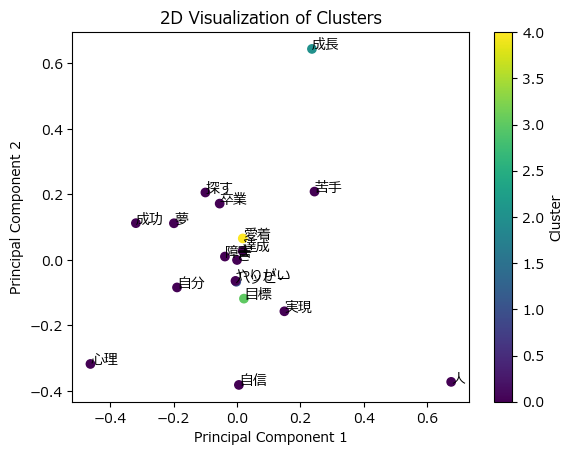

In [44]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA to reduce dimensions to 2
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(X.toarray())

# Predict cluster labels for each noun
labels = kmeans.predict(X)

# Plot the clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels, cmap='viridis')

# Annotate the points with the corresponding nouns
for i, noun in enumerate(nouns_target):
    plt.annotate(noun, (reduced_features[i, 0], reduced_features[i, 1]))

plt.title('2D Visualization of Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar().set_label('Cluster')
plt.show()
